In [48]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns

In [49]:
file = "nuevas mediciones/destilada medio dos filtros/"
file_name = "destilada medio"
Fields = np.load(file+file_name+" velocity_lists.npz")
U, V = Fields["Ulist"], Fields["Vlist"]

Fields = np.load(file+file_name+".npz")
x, y = Fields["x"], Fields["y"]

In [50]:
def mean_velocity_field(F):
    F_total = np.zeros_like(F[0])
    F_total_err = np.zeros_like(F[0])
    for i in tqdm(range(F[0].shape[0])):
        for j in range(F[0].shape[1]):
            counter = 0
            F_list = []
            for k in range(len(F)):
                if ~np.isnan(F[k][i, j]):
                    F_total[i, j] += F[k][i, j]
                    F_list.append(F[k][i, j])
                    counter += 1
            if counter != 0:
                F_total[i, j] = F_total[i, j]/counter
                F_total_err[i, j] = np.std(F_list)/np.sqrt(counter)
    return F_total, F_total_err

In [54]:
def error_correction(video_name: str):

    file = f"nuevas mediciones/"+video_name+" dos filtros/"
    file_name = video_name
    Fields = np.load(file+file_name+" velocity_lists.npz")
    U, V = Fields["Ulist"], Fields["Vlist"]

    Fields = np.load(file+file_name+".npz")
    x, y = Fields["x"], Fields["y"]

    U_total, U_total_err = mean_velocity_field(U)
    V_total, V_total_err = mean_velocity_field(V)

    ### Grafico los errores
    U_rel_err = U_total_err/U_total
    V_rel_err = V_total_err/V_total
    sns.heatmap(V_total_err, linewidth=0.5, vmax=1)
    plt.show()
    sns.heatmap(U_total_err, linewidth=0.5, vmax=1)
    plt.show()

    np.savez_compressed(file_name, x=x, y=y, U=U_total, V=V_total, Uerr=U_total_err, Verr=V_total_err)

100%|██████████| 75/75 [00:12<00:00,  5.89it/s]
/var/folders/m6/dj2mn85s7jg_r9ptl4kt_6q80000gn/T/ipykernel_21772/4005081702.py:15: RuntimeWarning: invalid value encountered in true_divide
  U_rel_err = U_total_err/U_total
/var/folders/m6/dj2mn85s7jg_r9ptl4kt_6q80000gn/T/ipykernel_21772/4005081702.py:16: RuntimeWarning: invalid value encountered in true_divide
  V_rel_err = V_total_err/V_total


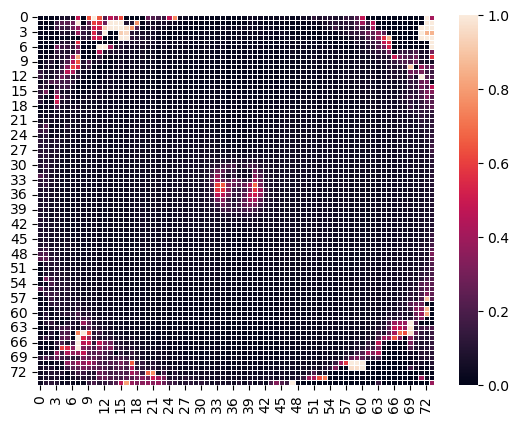

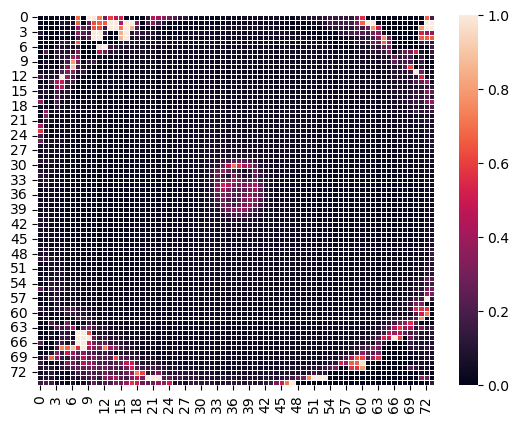

In [60]:
error_correction("glicerina 25 rapido")